In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)     # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, -1)

In [14]:
model = keras.Sequential([
    layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

In [15]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

In [16]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/5
422/422 - 10s - 24ms/step - accuracy: 0.9110 - loss: 0.2996 - val_accuracy: 0.9370 - val_loss: 0.1841
Epoch 2/5
422/422 - 2s - 5ms/step - accuracy: 0.9693 - loss: 0.1040 - val_accuracy: 0.9887 - val_loss: 0.0367
Epoch 3/5
422/422 - 2s - 6ms/step - accuracy: 0.9765 - loss: 0.0814 - val_accuracy: 0.9898 - val_loss: 0.0390
Epoch 4/5
422/422 - 2s - 5ms/step - accuracy: 0.9803 - loss: 0.0674 - val_accuracy: 0.9903 - val_loss: 0.0336
Epoch 5/5
422/422 - 2s - 5ms/step - accuracy: 0.9833 - loss: 0.0537 - val_accuracy: 0.9912 - val_loss: 0.0399


In [17]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 98.95%


In [18]:
preds = model.predict(x_test[:12])
pred_labels = np.argmax(preds, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


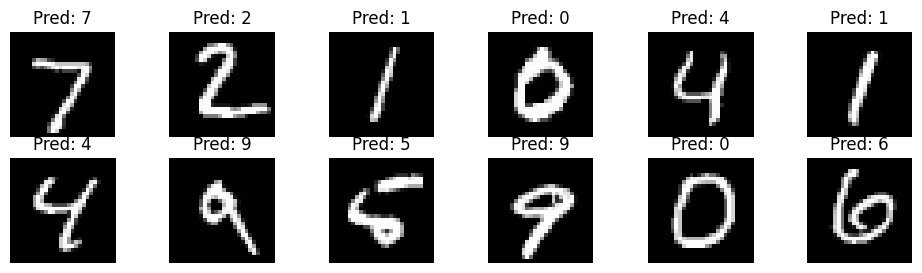

In [19]:
plt.figure(figsize=(12,3))
for i in range(12):
    plt.subplot(2,6,i+1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title(f"Pred: {pred_labels[i]}")
    plt.axis("off")
plt.show()
